## Actividad 3_6

<div style="border-style:groove;border-width:thin;padding:10px">

En esta actividad vamos a intentar solucionar un problema de regresión con uno de los métodos que hemos visto en clase hasta ahora:
- Regresión Lineal Simple.
- Regresión Lineal Múltiple.
- Regresión Polinómica.
</div>

<p style="border-style:groove;border-width:thin;padding:10px">
Lo primero que vamos a hacer es importar los datos y analizar el dataset que tenemos.
</p>

In [57]:
# Importar librerias
import pandas as pd
import numpy as np
import matplotlib_inline as plt


df_car = pd.read_csv("CarPrice_Assignment.csv", sep=",")

# Tratamiento de df_car
# Quitar columnas que no nos interesan
#df_car.drop(columns=["car_ID", "CarName"])

<p style="border-style:groove;border-width:thin;padding:10px">
A continuación vamos a modificar el dataset para eliminar lo que no nos interesa y cambiar las columnas para poder hacer una regresión.
    
</p>

In [71]:
# Necesitamos dividir las columnas, una columna de marca de coche y otra de modelo
df_car[["Marca", "Modelo"]] = (df_car["CarName"].str.strip().str.split(" ", n=1, expand=True))

df_car.drop(columns=["Modelo", "CarName"], inplace=True)

df_car

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Marca
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,gas,std,four,sedan,rwd,front,109.1,188.8,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,volvo
201,202,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,volvo
202,203,-1,gas,std,four,sedan,rwd,front,109.1,188.8,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,volvo
203,204,-1,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,volvo


<div style="border-style:groove;border-width:thin;padding:10px">
    Ahora comprobamos si hay valores nulos. A continuación vamos a proceder a cambiar las columnas que tienen categorías ("categorical features") para poder realizar una regresión con ellas. 
<p>Antes que nada, vamos a definir que son columnas categóricas. Son columnas cuyos datos deben pertenecer a un conjunto de valores finito. Este conjunto de valores puede ser numérico (en cuyo caso podemos usarlo directamente en una regresión) o un texto.</p>
<p>Si nos encontramos con columnas con texto, como es nuestro caso, lo más común es asignar valores numéricos a los valores de las columnas. Esta técnica se llama <b>One-hot encoding</b>. El cambio más habitual para poder realizar una regresión sería convertir la columna en varias, una por cada posible valor. Usando como ejemplo nuestro dataset, la columna <b>fueltype</b> se transformaría en 2 columnas, <b>fueltype-gas y fueltype-diesel</b>.</p>
    <p>Los posibles valores de estas columnas dependeran de la codificación que usemos:</p>
    <ul>
        <li><b>Dummy encoding:</b> Tendrán 0 o 1. En nuestro caso de ejemplo, un coche diesel tendrá 0 en fueltype-gas y 1 en fueltype-diesel.</li>
        <li><b>Simple effect encoding:</b> En vez de 0 y 1 tendrán -0,25 y 0,75. En el mismo ejemplo, el coche diesel tendría -0,25 en fueltype-gas y 0,75 en fueltype-diesel.</li>
    </ul>    
    <p>La función <b>get_dummies</b> de pandas nos permite hacer este cambio en una columa o una lista de columnas. Vamos a hacer un ejemplo con una columna y, después, a moficiar las demás.</p>
</div>

In [92]:
df_car.isna().sum() # Vemos que no hay nulos

df_dummies = pd.get_dummies(df_car)

# Esto sirve para ver las columnas del dummies
for columna in df_dummies.columns:
    print(columna)

df_dummies.corr(numeric_only=True)["price"].sort_values(ascending=False) # La columna que tiene mas relación con precio, es de enginesize, curbweight (peso en vacio) y horsepower

car_ID
symboling
wheelbase
carlength
carwidth
carheight
curbweight
enginesize
boreratio
stroke
compressionratio
horsepower
peakrpm
citympg
highwaympg
price
fueltype_diesel
fueltype_gas
aspiration_std
aspiration_turbo
doornumber_four
doornumber_two
carbody_convertible
carbody_hardtop
carbody_hatchback
carbody_sedan
carbody_wagon
drivewheel_4wd
drivewheel_fwd
drivewheel_rwd
enginelocation_front
enginelocation_rear
enginetype_dohc
enginetype_dohcv
enginetype_l
enginetype_ohc
enginetype_ohcf
enginetype_ohcv
enginetype_rotor
cylindernumber_eight
cylindernumber_five
cylindernumber_four
cylindernumber_six
cylindernumber_three
cylindernumber_twelve
cylindernumber_two
fuelsystem_1bbl
fuelsystem_2bbl
fuelsystem_4bbl
fuelsystem_idi
fuelsystem_mfi
fuelsystem_mpfi
fuelsystem_spdi
fuelsystem_spfi
Marca_Nissan
Marca_alfa-romero
Marca_audi
Marca_bmw
Marca_buick
Marca_chevrolet
Marca_dodge
Marca_honda
Marca_isuzu
Marca_jaguar
Marca_maxda
Marca_mazda
Marca_mercury
Marca_mitsubishi
Marca_nissan
Marca_peu

price                  1.000000
enginesize             0.874145
curbweight             0.835305
horsepower             0.808139
carwidth               0.759325
                         ...   
fuelsystem_2bbl       -0.501374
drivewheel_fwd        -0.601950
citympg               -0.685751
highwaympg            -0.697599
cylindernumber_four   -0.697762
Name: price, Length: 82, dtype: float64

<div style="border-style:groove;border-width:thin;padding:10px">
    Hay una columna categórica que tiene valores numéricos codificados en texto. En este caso he optado por modificarla y pasarla a un tipo de dato numérico aunque se podría hacer lo mismo que con las demás.
</div>

<div style="border-style:groove;border-width:thin;padding:10px">
    También se pueden modificar muchas columnas a la vez con el parámetro de get_dummies columns. En este caso no hay que especificar un prefix para que de nombre a las columnas. Pone por defecto el nombre de la columna original.
</div>

In [93]:
df_dummies.isnull().sum()

car_ID              0
symboling           0
wheelbase           0
carlength           0
carwidth            0
                   ..
Marca_toyouta       0
Marca_vokswagen     0
Marca_volkswagen    0
Marca_volvo         0
Marca_vw            0
Length: 82, dtype: int64

<div style="border-style:groove;border-width:thin;padding:10px">
Para generar los conjuntos X e y vamos a eliminar price en X para coger solo esa columna en y.
</div>

In [94]:
#Preparamos X e y
X = df_dummies.drop(columns="price")
y = df_dummies["price"].to_frame()

print(X.shape)
print(y.shape)

(205, 81)
(205, 1)


<div style="border-style:groove;border-width:thin;padding:10px">
Ahora vamos a entrenar el sistema usando un modelo de regresión lineal. ¿Será suficiente? Vamos a usar todas las columnas. También se podría probar a usar un subconjunto de columnas.
</div>

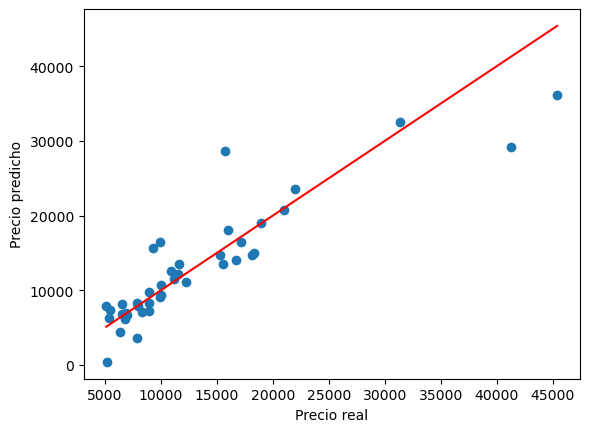

R2: 0.8105058209585232
MSE: 14669949.245694617


In [95]:
#Entrenamiento de modelo
#Dividimos el dataset en training y test set.
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#Creamos y entrenamos el modelo de regresión lineal.
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

#Calculamos con el modelo los resultados para el dataset de test.
y_pred = lm.predict(X_test)

plt.scatter(y_test.values.ravel(), y_pred)
plt.xlabel("Precio real")
plt.ylabel("Precio predicho")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red")
plt.show()

print("R2:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

## Ahora voy a hacerlo con un polinomio

R2: -10.049316419000096
MSE: 826777490.1071991


ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- Marca_Nissan
- Marca_alfa-romero
- Marca_audi
- Marca_bmw
- Marca_buick
- ...


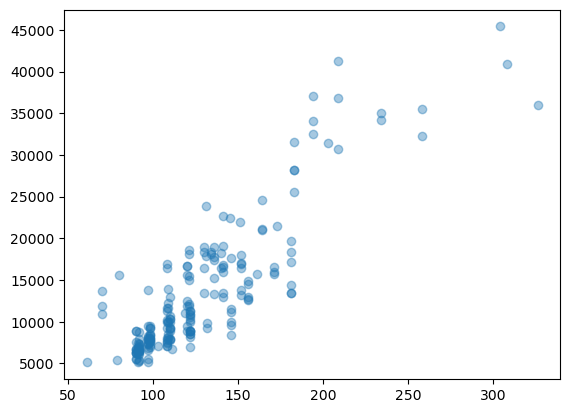

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)

poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly  = poly.transform(X_test)

lm = LinearRegression()
lm.fit(X_train_poly, y_train)

y_pred = lm.predict(X_test_poly)
print("R2:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

x = np.linspace(X_train["enginesize"].min(), X_train["enginesize"].max(), 200)
Xline = pd.DataFrame({
    "enginesize": x,
    "curbweight": X_train["curbweight"].mean(),
    "horsepower": X_train["horsepower"].mean()
})

plt.scatter(X["enginesize"], y.values.ravel(), alpha=0.4)
plt.plot(x, lm.predict(poly.transform(Xline)), "r")
plt.xlabel("enginesize"); plt.ylabel("price")
plt.show()



<div style="border-style:groove;border-width:thin;padding:10px">
El resultado obtenido es 0.87 de R². Está bastante bien. El error cuadrático medio que estamos teniendo en el conjunto de test es de 3100€. Teniendo en cuenta el precio de un coche no parece un error pequeño. Vamos a intentar hacerlo mejor. 
    <p>Si habéis pintado las relaciones entre las distintas columnas habréis visto que hay algunas que parecen tener una relación polinómica con el precio. En concreto de grado 2. Vamos a probar con una regresión polinómica, de nuevo, con todas las columnas.</p>
</div>

<div style="border-style:groove;border-width:thin;padding:10px">
¿Porqué sale tan mal? ¿Es dummy coding oportuno para lo que estamos haciendo?
El dummy encoding da valores de 0 y 1. El problema de estos valores es que 0 y 1 al cuadrado, al cubo, etc. no cambian de valor, luego hacer la regresión polinómica no tiene mucho sentido.
Vamos a probar con un "Simple effect encoding". Las columnas serán iguales pero en vez de valores de 0 y 1 tendremos -0.25 y 0.75. Para lograr esto simplemente restamos 0.25 a todas las columnas que hemos creado:
</div>

<div style="border-style:groove;border-width:thin;padding:10px">
Vamos a volver a hacer la regresión polinómica. A ver si esta vez obtenemos un resultado mejor que con la regresión lineal. La intuición en este caso nos indica que deberíamos obtener un resultado mejor ya que hay algunas variables que tienen relación de grado 2 con el precio.
</div>

<div style="border-style:groove;border-width:thin;padding:10px">
Esta vez el R² es muy bueno y nos estamos equivocando de media 474€ en cada coche, lo cual es un dato de error bastante bueno. 
</div>